# Describing Distributions

## Setup

Import our modules again:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

And load the MovieLens data.  We're going to pass the `memory_use='deep'` to `info`, so we can see the total memory use including the strings.

In [2]:
movies = pd.read_csv('../resources/data/ml-25m/movies.csv')
movies.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.6 MB


In [3]:
ratings = pd.read_csv('../resources/data/ml-25m/ratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


Quickly preview the `ratings` frame:

In [4]:
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


Movie stats:

In [5]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['mean', 'count'])
movie_stats

,mean,count
movieId,,
1,3.893708,57309
2,3.251527,24228
3,3.142028,11804
4,2.853547,2523
5,3.058434,11714
...,...,...
209157,1.500000,1
209159,3.000000,1
209163,4.500000,1


In [6]:
movie_info = movies.join(movie_stats, on='movieId')
movie_info

,movieId,title,genres,mean,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,57309.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,24228.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,11804.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,2523.0
4,5,Father of the Bride Part II (1995),Comedy,3.058434,11714.0
...,...,...,...,...,...
62418,209157,We (2018),Drama,1.500000,1.0
62419,209159,Window of the Soul (2001),Documentary,3.000000,1.0
62420,209163,Bad Poems (2018),Comedy|Drama,4.500000,1.0
62421,209169,A Girl Thing (2001),(no genres listed),3.000000,1.0


## Normal Distribution

I want to visualize an array of random, normally-distributed numbers.

We'll first generate them:

In [7]:
numbers = pd.Series(np.random.randn(10000) + 5)
numbers

0       6.570921
1       4.735679
2       7.431932
3       6.569521
4       5.525533
          ...   
9995    4.831635
9996    4.929839
9997    3.485257
9998    4.028042
9999    2.700840
Length: 10000, dtype: float64

And then describe them:

In [8]:
numbers.describe()

count    10000.000000
mean         5.000319
std          0.996098
min          0.991050
25%          4.319578
50%          5.001584
75%          5.677723
max          8.832225
dtype: float64

And finally visualize them:

(array([3.000e+00, 2.000e+00, 7.000e+00, 1.500e+01, 3.500e+01, 9.300e+01,
        1.780e+02, 3.120e+02, 5.380e+02, 7.360e+02, 1.009e+03, 1.177e+03,
        1.166e+03, 1.173e+03, 1.107e+03, 8.560e+02, 6.690e+02, 4.190e+02,
        2.660e+02, 1.310e+02, 6.100e+01, 3.300e+01, 9.000e+00, 4.000e+00,
        1.000e+00]),
 array([0.99104969, 1.30469671, 1.61834373, 1.93199075, 2.24563777,
        2.55928479, 2.87293182, 3.18657884, 3.50022586, 3.81387288,
        4.1275199 , 4.44116692, 4.75481394, 5.06846096, 5.38210798,
        5.695755  , 6.00940202, 6.32304904, 6.63669606, 6.95034308,
        7.2639901 , 7.57763712, 7.89128414, 8.20493116, 8.51857818,
        8.8322252 ]),
 <BarContainer object of 25 artists>)

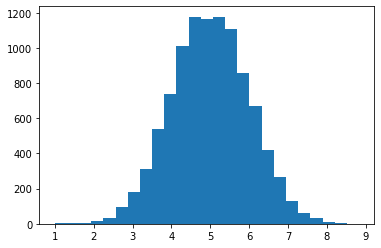

In [9]:
plt.hist(numbers, bins=25)

## Average Movie Rating

To start looking at some real data, let's look at the distribution of average movie rating:

In [10]:
movie_info['mean'].describe()

count    59047.000000
mean         3.071374
std          0.739840
min          0.500000
25%          2.687500
50%          3.150000
75%          3.500000
max          5.000000
Name: mean, dtype: float64

Let's make a histogram:

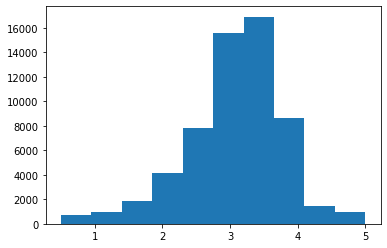

In [11]:
plt.hist(movie_info['mean'])
plt.show()

And with more bins:

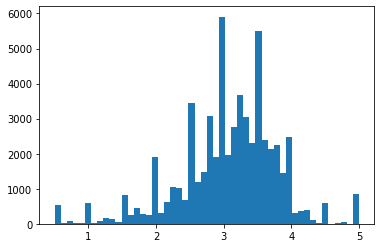

In [12]:
plt.hist(movie_info['mean'], bins=50)
plt.show()

## Movie Count

Now we want to describe the distribution of the ratings-per-movie (movie popularity).

In [13]:
movie_info['count'].describe()

count    59047.000000
mean       423.393144
std       2477.885821
min          1.000000
25%          2.000000
50%          6.000000
75%         36.000000
max      81491.000000
Name: count, dtype: float64

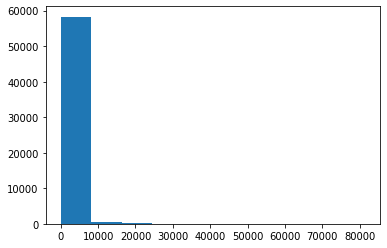

In [14]:
plt.hist(movie_info['count'])
plt.show()

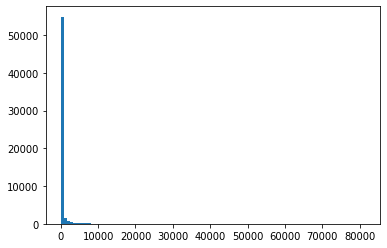

In [15]:
plt.hist(movie_info['count'], bins=100)
plt.show()

That is a very skewed distribution. Will it make more sense on a logarithmic scale?

We don't want to just log-scale a histogram - it will be very difficult to interpret.  We will use a point plot.

The `value_counts()` method counts the number of times each value appers. The resulting series is indexed by value, so we will use its index as the x-axis of the plot.  Indexes are arrays too!

Text(0.5, 0, 'Number of Ratings')

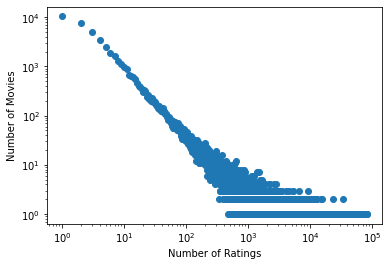

In [16]:
hist = movie_info['count'].value_counts()
plt.scatter(hist.index, hist)
plt.yscale('log')
plt.ylabel('Number of Movies')
plt.xscale('log')
plt.xlabel('Number of Ratings')

Now let's look at the **empirical CDF** of popularity:

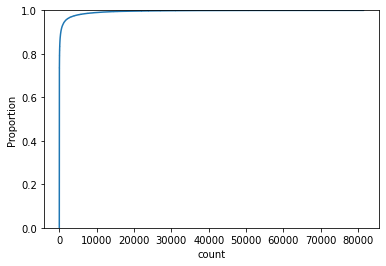

In [17]:
sns.ecdfplot(movie_info['count'])
plt.show()

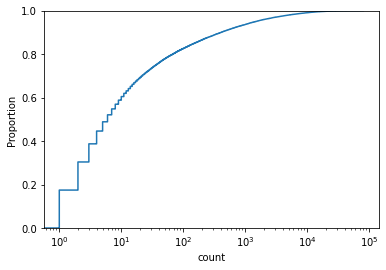

In [18]:
sns.ecdfplot(movie_info['count'], log_scale=True)
plt.show()

## Penguins

Let's load the Penguin data (converted from R):

In [19]:
penguins = pd.read_csv('penguins.csv')
penguins

FileNotFoundError: [Errno 2] No such file or directory: 'penguins.csv'

Now we'll compute a histogram. There are ways to do this automatically, but for demonstration purposes I want to do the computations ourselves:

In [ ]:
spec_counts = penguins['species'].value_counts()
plt.bar(spec_counts.index, spec_counts)
plt.xlabel('Species')
plt.ylabel('# of Penguins')

What if we want to show the fraction of each species?  We can divide by the sum:

In [ ]:
spec_fracs = spec_counts / spec_counts.sum()
plt.bar(spec_counts.index, spec_fracs)
plt.xlabel('Species')
plt.ylabel('Fraction of Penguins')